# D210 - Representation and Reporting Performance Assessment

Assignment Completed by Favio Conde and Submitted August 2, 2023 for WGU - MSDA

### Table of Contents

#### Part I: Interactive Data Dashboard
<ul>
    <li><a href='#a1'>A1: Data Sets</a></li>
    <li><a href='#a2'>A2: Installation Instructions</a></li>
    <li><a href='#a3'>A3: Navigation Instructions</a></li>
</ul>
 
#### Part II: Storytelling with Data
<ul>
    <li><a href='#b'>B. Panopto Video Recording</a></li>
</ul> 

#### Part III: Reflection Paper
<ul>
    <li><a href='#c1'>C1: Dashboard Alignment</a></li>
    <li><a href='#c2'>C2: Additional Data Set Insights</a></li>
    <li><a href='#c3'>C3: Decision-Making Support</a></li>
    <li><a href='#c4'>C4: Interactive Controls</a></li>
    <li><a href='#c5'>C5: Colorblindness</a></li>
    <li><a href='#c6'>C6: Data Representations</a></li>
    <li><a href='#c7'>C7: Audience Analysis</a></li>
    <li><a href='#c8'>C8: Universal Access</a></li>
    <li><a href='#c9'>C9: Effective Storytelling</a></li>
</ul>

#### Part IV: Sources
<ul>
    <li><a href='#d'>D. Third-Party Code Reference</a></li>
    <li><a href='#e'>E. Sources</a></li>
</ul>

### PART I: INTERACTIVE DATA DASHBOARD

#### A1. Data Sets<a id='a1'></a>

For this assignment, I used one of the available WGU datasets and a dataset found on Kaggle's website.

The two datasets are:

<ul>
    <li>Kaggle: Diabetes Prediction Dataset (<a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset">Link</a>)</li>
    <li>WGU: Medical Dataset</li>
</ul>

In preparation for the Tableau portion of the assignment, I imported both datasets and normalized them using Python.

In Jupyter Notebook I started off by importing the following libraries:

<ul>
    <li>NumPy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
</ul>

I familiarized myself with both datasets by inspecting each dataframe using `.shape` and `.info()` to see how many rows and columns and the data types of each column.  In the next step, I checked for null values; neither dataset had null values, so I did not use any method to impute missing values.  While checking for duplicates, I found that the Kaggle dataset had 3,854 duplicates, so I dropped them from the dataset.

In order to normalize the datasets, I kept only the following columns:

<ul>
    <li>Gender</li>
    <li>Age</li>
    <li>HighBlood</li>
    <li>Diabetes</li>
</ul>

Additionally, I updated the names in the Kaggle dataset to match the format and column names of the WGU dataset.  In the Kaggle data, I changed `Age` to integer, `High_Blood` and `Diabetes` to category.  The next step in normalizing the data was to change `Other` in `Gender` to `Nonbinary`.  The last step in normalizing the data was to encode `High_Blood` and `Diabetes` in the Kaggle dataset to `0`/`1` from `No`/`Yes`.

There was a mismatch in the `Age` range from both datasets; WGU's lower range was 18, and Kaggle's was 1, and WGU's maximum age value was 89, and Kaggle's was 79.  I removed the ages to have only ages appearing in both datasets left.

I exported each dataset to a CSV, then merged both and exported to a CSV.  The merged file is what I imported into Tableau.

Please find the code explained in this section below.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Output display settings
pd.set_option('display.max_columns', None)

# Importing medical_clean.csv file into Jupyter
wgu = pd.read_csv(r'Files\WGU\medical_clean.csv')
kaggle = pd.read_csv(r'Files\Kaggle\diabetes_prediction_dataset.csv')

print('-'*37)
print(f'WGU Dataset: {wgu.shape[0]} Rows, {wgu.shape[1]} Columns')
print('-'*37)
print(f'Kaggle Dataset: {kaggle.shape[0]} Rows, {kaggle.shape[1]} Columns')
print('-'*37)

-------------------------------------
WGU Dataset: 10000 Rows, 50 Columns
-------------------------------------
Kaggle Dataset: 100000 Rows, 9 Columns
-------------------------------------


In [2]:
#Inspecting columns and notate common columns
print(wgu.info())
print('-'*100)
print(kaggle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
#Checking null values and duplicates
print('Null Value Check')
print('-'*25)
print(wgu.isnull().sum())
print('-'*25)
print(kaggle.isnull().sum())
print('-'*100)
print('Duplicate Check')
print('-'*15)
print(wgu.duplicated().value_counts())
print('-'*15)
print(kaggle.duplicated().value_counts())
print('-'*100)

Null Value Check
-------------------------
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days         

In [4]:
#Dropping duplicates from Kaggle dataset
kaggle.drop_duplicates(inplace=True)
print(kaggle.duplicated().value_counts())

False    96146
dtype: int64


In [5]:
#Normalizing data between both datasets
wgu = wgu[['Gender', 'Age', 'HighBlood', 'Diabetes']]
kaggle = kaggle[['gender', 'age', 'hypertension', 'diabetes']]

#Normalizing column names between both datasets
kaggle.rename(columns={'gender': 'Gender'}, inplace=True)
kaggle.rename(columns={'age': 'Age'}, inplace=True)
kaggle.rename(columns={'hypertension': 'High_Blood'}, inplace=True)
kaggle.rename(columns={'diabetes': 'Diabetes'}, inplace=True)
wgu.rename(columns={'HighBlood': 'High_Blood'}, inplace=True)


#Changing data types
kaggle['Age'] = kaggle['Age'].astype('int')
kaggle['High_Blood'] = kaggle['High_Blood'].astype('category')
kaggle['Diabetes'] = kaggle['Diabetes'].astype('category')


#Changing Kaggle's dataset from 'Other' to 'Nonbinary' to match WGU dataset
kaggle['Gender'] = kaggle['Gender'].replace('Other', 'Nonbinary')

In [7]:
#Encoding Kaggle's data from 'Yes'/'No' to '1'/'0' to match WGU's dataset
kaggle['High_Blood'] = kaggle['High_Blood'].map({1:'Yes',0: 'No'})
kaggle['Diabetes'] = kaggle['Diabetes'].map({1:'Yes',0: 'No'})


In [8]:
#Checking data after normalizing data and removing duplicates
print('-'*38)
print(f'WGU Dataset: {wgu.shape[0]} Rows, {wgu.shape[1]} Columns')
print('-'*38)
print(f'Kaggle Dataset: {kaggle.shape[0]} Rows, {kaggle.shape[1]} Columns')
print('-'*38)

--------------------------------------
WGU Dataset: 10000 Rows, 4 Columns
--------------------------------------
Kaggle Dataset: 96146 Rows, 4 Columns
--------------------------------------


In [9]:
#Adding source identifying column
wgu['Source'] = 'WGU'
kaggle['Source'] = 'Kaggle'

#Checking count from Kaggle's dataset for age < 18 or > 89
print(kaggle[(kaggle['Age'] < 18) | (kaggle['Age'] > 89)].count())

Gender        16688
Age           16688
High_Blood    16688
Diabetes      16688
Source        16688
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

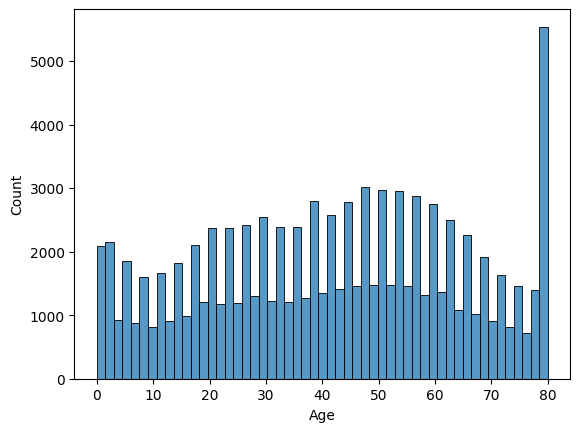

In [10]:
#Checking 'Age' column for Kaggle
sns.histplot(data=kaggle, x='Age')

In [11]:
#Checking count from Kaggle's dataset for age < 18 or > 79
kaggle[(kaggle['Age'] < 18) | (kaggle['Age'] > 79)].count()

Gender        21620
Age           21620
High_Blood    21620
Diabetes      21620
Source        21620
dtype: int64

In [12]:
#Dropping ages < 18 or > 79 from Kaggle's dataset to match WGU's dataset
kaggle = kaggle.drop(index=(kaggle[(kaggle['Age'] < 18) | (kaggle['Age'] > 79)]).index)

In [13]:
#Dropping ages > 79 from WGU's dataset to match Kaggle's dataset
wgu = wgu.drop(index=wgu[wgu['Age'] > 79].index)

In [14]:
#Exporting WGU and Kaggle datasets to CSV
wgu.to_csv(r'Files\WGU\wgu_prepared.csv', index=False)
kaggle.to_csv(r'Files\Kaggle\kaggle_prepared.csv', index=False)

In [15]:
#Merge both df into one and export to CSV file
df = pd.concat([wgu, kaggle])
df.to_csv(r'Files/prepared_dataset.csv', index=False)

#### A2. Installation Instructions<a id='a2'></a>

No installation of the dashboard is needed.  To view the dashboard, please follow the <a href="https://public.tableau.com/app/profile/favio.conde/viz/D210PADashboard_16909235032180/PA">link</a> using any internet browser.  I used Tableau Public to complete the assignment, so no program installation and credentials are needed to view the dashboard.

#### A3. Navigation Instructions<a id='a3'></a>

Once the dashboard is accessed, the user will immediately land on the `Medical Data Analysis: Diabetes & Hypertension Patient Information` dashboard, which includes two slides with information about the WGU and Kaggle datasets.  The first slide consists of KPIs across the top and graphs showing `Age County by Source`, `Table Summary`, and `Gender by Source`.  Across the top of the slide, the user can interact with the dashboard using the `Age` slider, `Condition` filter, or the `Gender` filter.

To navigate to the next slide, the user can click on the grey box on the right with the description `Detailed patient information by condition`.

The second slide has KPIs and information on `Condition by Age & Source` and `Condition by Source`.  This slide also has interactive sliders and filters across the top, similar to the first slide.

Across the top in both slides, there are four KPIs: `# of Patients`, `% Diabetic`, `% Hypertension`, and `Avg. Patient Age`.  The description of each is below:

<ul>
    <li># of Patients: the number of patients in all of the data; impacted by selecting filters</li>
    <li>% Diabetic: percent of diabetic patients from entire datasets; impacted by selecting filters</li>
    <li>% Hypertension: percent of hypertension patients from entire datasets; impacted by selecting filters</li>
    <li>Avg. Patient Age: the average patient age from entire data; impacted by selecting filters</li>
</ul>

In each slide, the graphs work as filters as well.  For example, in the first slide under `Gender by Source`, clicking on any of the pie slices acts as a filter, so if you click on the blue slice for WGU (which is the `Female` portion), then `Female` is selected as a filter.  All of the data in the slide is adjusted to include female data only.

### PART II: STORYTELLING WITH DATA

#### B. Panopto Video Recording<a id='b'></a>

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=72d46748-ddc4-459a-8146-b05200f48eda">Video Link</a>.

### PART III: REFLECTION PAPER

#### C1. Dashboard Alignment<a id='c1'></a>

The hospital aims to understand better what affects readmission to predict rates better. By investigating prevalent conditions in the population, such as diabetes and hypertension, the hospital can assess if readmission rates are affected by these conditions.

Suppose the hospital determines that patients with diabetes or hypertension are more likely to be readmitted. In that case, the hospital can explore what care methods the staff should implement during a patient's initial admission to reduce the readmission rate.

The dashboard allows the team to dive deeper into patients who have diabetes, hypertension, or both and see this broken down by age, gender, and source.  What is the readmission rate for older male patients with diabetes and hypertension?  The hospital will be able to see what percentage of patients fall in this category and do further research to determine if this patient profile has a high probability of readmission.

#### C2. Additional Data Set Insights<a id='c2'></a>

Although Kaggle's dataset did not include new variables, it had almost eight times the number of data rows as WGU's dataset.  Having more data, I could analyze medical conditions and gender to see how common these are.

A limitation we've seen with WGU's medical dataset in the past analysis is the age range from 18 to 89.  Kaggle's dataset includes data for patients less than one-year-old.  Using the combined data, I can extend my analysis into age groups I've previously been unable to.

#### C3. Decision-Making Support<a id='c3'></a>

Using the `Condition` drop-down filter, the executive team can quickly see important information to assist in decision-making.  The drop-down allows the user to easily view specific details about patients with a specific medical condition, and the dashboard provides pertinent information at the user's fingertip.  For example, by selecting `Diabetic`, I can see 6,980 patients with an average age of 56.16; the majority are female.

In the second slide, the executive team can easily see in the `Condition by Age & Source` where the higher concentrations are of patients who have diabetes or hypertension, depending on what the user selects in the `Condition` drop-down menu.

#### C4. Interactive Controls<a id='c4'></a>

The `Age Slider` allows users to laser focus their view on specific ages.  The user can adjust the age by selecting the minimum or maximum age or adjusting both extremes.  When the slider is changed, the data presented in each graph, along with the KPIs, update automatically to show information for patients within the selected age range.

Similar to the `Age Slider`, the `Gender` drop-down menu allows the user to view data for the selected gender.  When the user selects a gender type in the drop-down menu, the graphs and KPIs will automatically update to show information for patients with the desired gender type.

#### C5. Colorblindness<a id='c5'></a>

Kilin's article discussed the different colorblindness types and recommended color palettes.  I used Tableau's palette called `Color Blind`.  This palette includes the following colors:

<ul>
    <li>Blue Hex Code #1170AA</li>
    <li>Light Orange Hex Code #FFBC79</li>
    <li>Light Gray Hex Code #A3ACB9</li>
</ul>

By using colors that are friendly to individuals with colorblindness, I ensure that all viewers can adequately examine the details in the dashboard.

#### C6. Data Representations<a id='c6'></a>

In the different analyses I've completed in past classes, diabetes and hypertension have been identified as variables that may be a predictor of readmission.  The `Age Count by Source` in the first slide lets me dig deeper to see how many patients have diabetes, hypertension, or both.  In past analyses, diabetes and hypertension were separate variables, but this analysis may provide insight into both conditions being strong predictors of readmission.

The `Condition by Age & Source` allows me to analyze further what patients with diabetes, hypertension, or both look like.  I can see what age groups typically suffer from these medical conditions and how the readmission rates for those age groups are compared to patients who don't have these medical conditions.

#### C7. Audience Analysis<a id='c7'></a>

The dataset dictionary states that my audience is the hospital's executive leadership team.  With this in mind, I purposely refrained from showing too technical information and kept the details and message broad.  I used graphs that are easy to analyze and interpret.  I also added interactive tools (i.e., filters) within the dashboard to allow the leadership team to inspect the data to view actionable information.

#### C8. Universal Access<a id='c8'></a>

I used Tableau Public, which the user can access with an internet connection.  To view the dashboard, the user does not need to install software or create an account with Tableau.  The user can use the link to the dashboard to view and interact with the data.

#### C9. Effective Storytelling<a id='c9'></a>

According to Microsoft, for effective storytelling you must use intentional visuals that include the following:

<ul>
    <li>Appropriate</li>
    <li>Legible</li>
    <li>Not misleading</li>
</ul>

In my visualizations, I focused on legibility.  I ensured that labels weren't running into each other, headers weren't cut off, and the descriptions of columns, rows, and charts made sense and were easy to interpret.

I did not want to mislead the dashboard user, so I avoided changing the axis starting points and used percentages to allow the user to compare WGU's and Kaggle's data better since the latter's dataset was much larger than WGU's.

### PART IV: SOURCES

#### D. THIRD-PARTY CODE REFERENCES<a id='d'></a>

No code references were used.

#### E. SOURCES<a id='e'></a>

Kilin, Ivan (2022, April 27).  <i>The best charts for color blind viewers</i>.  Datylon.
    </br>&emsp;&emsp;Retrieved August 1, 2023, from https://www.datylon.com/blog/data-visualization-for-colorblind-readers#color-blind-palette

Microsoft (n.d.).  <i>Storytelling with data visualization</i>.  Microsoft Power BI.
    </br>&emsp;&emsp;Retrieved August 1, 2023, from https://powerbi.microsoft.com/en-us/data-visualization-vs-storytelling/

Mustafa, Mohammed (n.d.).  <i>Diabetes prediction dataset</i>.  Kaggle.
     </br>&emsp;&emsp;Retrieved July 27, 2023, from https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download